# License Plate Detection with OpenCV

In this project we demonstrate how to use OpenCV only, with traditional computer vision approaches, to perform License Plate Detection (LPD). 

We follow two approaches:

1- __Morphology based approach__: where only morphological transforms are used, along with some rules to detect the LP.

2- __Charater based approach__: in addition to basic morphological approaches, basic char detection, also based on morphology, is used as an extra characteristic of the LP.

Further, the problem of Licence Plate Recognition (LPR), by recognizing the number and digits written, can be addressed by the second approach.

In both approaches, we load HD videos (1080p). Due to the camera position, this is the most effective resolution to detect LP patterns.

In both approaches we merge car detection, using background subtraction, to narrow the search space.

# Pre-requisites

You need to install the packages in `requirements.txt`:
    
`pip install -r requirements.txt`

In [3]:
from utils import *
from MOD import detect_moving_objects
import numpy as np
import cv2
import imutils
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
from video import process_video


# Moving object detection (MOD)

In this part, we show how to detect and isolate the car box. 

We use background subtraction. [See this reference](https://www.pyimagesearch.com/2015/05/25/basic-motion-detection-and-tracking-with-python-and-opencv/). This is possible due to the fixed camera position.

We can detect bounding rectangle or oriented one. The oriented bbox is not very accurate, and later it turns to be not important for LPD.

## Video processing
The `process_video` function takes car of frame processing of the given `video_file`. The output is saved in the location of the output `video_output_file`.

This function can be used to:
- Detect Moving cars.
- Detect LPs within car frames, and plot it back in the original frame.
- Detect LPs in the big frame directly.

In [4]:
from video import process_video
video_file = 'dat/detection_test.mp4'
video_output_file = 'dat/cars_detection.mp4'
process_video(video_file, video_output_file, show_cars_bbox=1)

100%|██████████| 2171/2171 [01:07<00:00, 32.13it/s]

Video is ready at:  dat/cars_detection.mp4


From command line

In [5]:
!python main.py --video_file dat/detection_test.mp4 --video_output_file dat/cars_detection.mp4 --show_cars_bbox 1

OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
100%|███████████████████████████████████████| 2171/2171 [01:15<00:00, 28.72it/s]
Video is ready at:  dat/cars_detection.mp4


# Morphology based approach

This approach is based on applying morphological operations to emphasasize the LP pattern. Mainly, two main patters:
- Edge of bright area
- Rectangular shape

As usual with rule based approaches, we suffer sensitivity to parameters settings. To make it less critical we perform two simple tricks:
- Apply the rules only on the car patches, thanks to the car detection step.
- Resize into standard size makes it easier to set global rules, with less sensitivity to scale. This is also possible thanks to the car detection step.

In this approach we follow the following steps:

- Resize frame to standard size.
- Transform frame into gray scale.
- Adaptive thresholding.
- Canny edge detection.
- Dilation loop (3 iteration, 3x3 kernel).
- Contours on dialted image.
- Get candidate plates by fitting oriented bbox around contours.
- Filter the candidate LPs with rules on L,W of the oriented bbox. 
- Resize the frame back into the original size



In [6]:
from morpho import detect_LP

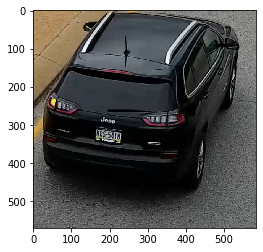

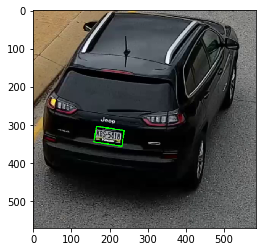

In [7]:
img  = cv2.imread("imgs/char_frame_180_car_no_lp1.png")
plot_img(img)
detected_img, LPs = detect_LP(img, debug=False)
plot_img(detected_img)

## Calibrating the rules
In this section we use sample images captured from the test video in order to calibrate the min and max L and W of the plate detection.

We set `debug=True` in order to see the intermediate results (thresholding, edges, dilation).

In [1]:
import cv2
from utils import plot_img
from morpho import detect_LP_morpho
img  = cv2.imread("imgs/char_frame_180_car_no_lp1.png")
plot_img(img)
detected_img, LPs = detect_LP_morpho(cv2.resize(img, (500,500)), L_min=35, L_max=60, W_min=55, W_max=90, debug=True)
plot_img(detected_img)

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [9]:
video_file = 'dat/detection_test.mp4'
video_output_file = 'dat/morpho_LP_detection.mp4'
process_video(video_file, video_output_file, detect_LP_fn=detect_LP)

100%|██████████| 2171/2171 [01:22<00:00, 26.46it/s]

Video is ready at:  dat/morpho_LP_detection.mp4


From command line:

In [10]:
!python main.py --video_file dat/detection_test.mp4 --video_output_file dat/cars_detection.mp4 --detect_LP_fn 2

OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
100%|███████████████████████████████████████| 2171/2171 [01:21<00:00, 26.74it/s]
Video is ready at:  dat/cars_detection.mp4


We notice the following problems:
- Many false positives
- Rules apply to disoriented false contours
- Aggeessive dilation make bigger rectangles in some cases


It is recommended:
- Integrate a tracker to smooth the false positives (TBD).
- Add more features of LP, like characters, which we will do next.

# Character based approach

The main approach in this part is imported from this nice git [repo](https://github.com/MicrocontrollersAndMore/OpenCV_3_License_Plate_Recognition_Python.git) Code is copied here just for self contained repo, with minor changes.


The approach shares the same preprocessing steps as in the morphological approach above.

However, we integrate extra features, which is char detection. This facilitates the filtering out operation, instead of only relying on the L, W rules.

The downside is that, we now depend on the language of the sign. For different languages, we need different char detector, which is not a bi issue.

In [11]:
from char import detect_LP_char

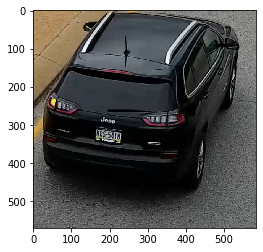

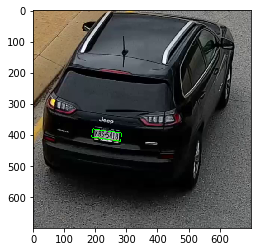

In [12]:
img  = cv2.imread("imgs/char_frame_180_car_no_lp1.png")
plot_img(img)
detected_img, LPs = detect_LP_char(cv2.resize(img, (700,700)),  L_min=0, L_max=50, W_min=0, W_max=150, debug=True)
plot_img(detected_img)

In [13]:
from char import detect_LP

In [14]:
video_file = 'dat/detection_test.mp4'
video_output_file = 'dat/char_LP_detection.mp4'
process_video(video_file, video_output_file, detect_LP_fn=detect_LP)

100%|██████████| 2171/2171 [04:13<00:00,  8.57it/s]

Video is ready at:  dat/char_LP_detection.mp4


From command line:

In [15]:
!python main.py --video_file dat/detection_test.mp4 --video_output_file dat/cars_detection.mp4 --detect_LP_fn 1

OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
100%|███████████████████████████████████████| 2171/2171 [03:44<00:00,  9.68it/s]
Video is ready at:  dat/cars_detection.mp4


The effect of adding the characters detection feature is clear in filtering out false positive.

# Effect of MOD
Now we will run the same approach, but on the whole frame, instead of detecting the car first

In [16]:
video_file = 'dat/detection_test.mp4'
video_output_file = 'dat/char_LP_detection_without_car_detection.mp4'
process_video(video_file, video_output_file, detect_LP_fn=detect_LP, cars_detection=False)

100%|██████████| 2171/2171 [04:06<00:00,  8.82it/s]

Video is ready at:  dat/char_LP_detection_without_car_detection.mp4


In [17]:
!python main.py --video_file dat/detection_test.mp4 --video_output_file dat/cars_detection.mp4 --detect_LP_fn 1 --cars_detection False

OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
100%|███████████████████████████████████████| 2171/2171 [03:40<00:00,  9.85it/s]
Video is ready at:  dat/cars_detection.mp4


Again, lots of false positives detected. This shows the effect of detecting the moving cars as a preprocessing step.

In the final video, you might now see any detected plates, since they are all filtered out by the internal rules.

# Conclusion

In this project we used native OpenCV, with traditional CV transformations, to detect the license plates. Morphological operations can do the job, however, it requires tuning, and is sensitive to calibration. Adding some features like characters matching improves the performance, however, it might require tuning on different languages.

# References
- https://www.pyimagesearch.com/2015/05/25/basic-motion-detection-and-tracking-with-python-and-opencv/
- https://sod.pixlab.io/articles/license-plate-detection.html
- https://github.com/MicrocontrollersAndMore/OpenCV_3_License_Plate_Recognition_Python.git